<a href="https://colab.research.google.com/github/villeraluis/ejerciciospy/blob/main/trabajo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
ds = scipy.io.loadmat('ds00')
x = ds['trainingx'].T
r = ds['trainingy'].T
test_x = ds['testx'].T
test_r = ds['testy'].T


In [ ]:
X = np.concatenate((np.ones((len(x), 1)), x.reshape(len(x), 1)), axis = 1)

In [ ]:
def gaussianKernel(xi, xj, sigma):
   return np.exp( - np.linalg.norm(xj - xi)**2 / 2 * sigma**2)

In [ ]:
def GramMatrix(X,sigma):
  G = np.zeros((X.shape[0], X.shape[0]))

  for irow in range(G.shape[0]):
    for jcol in range(G.shape[1]):
      G[irow, jcol] = gaussianKernel(X[irow, :], X[jcol, :], sigma)


  return G

In [ ]:
sigma = 4
regpar = 0.01
Gram = GramMatrix(X,sigma)
alpha = np.linalg.inv(Gram + regpar * np.identity(X.shape[0])) @ r

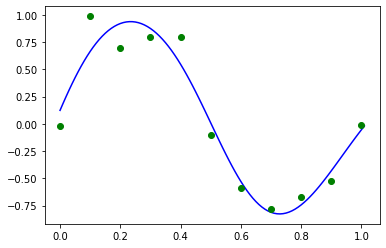

In [ ]:
xs = np.arange(0, 1.02, 0.01)
xs = xs.reshape(len(xs), 1)
Xs = np.concatenate((np.ones((len(xs), 1)), xs.reshape(len(xs), 1)), axis = 1)
Ys = np.zeros(Xs.shape[0])

for newValue in range(len(Ys)):
  for tc in range(len(alpha)):
    Ys[newValue] += alpha[tc] * gaussianKernel(Xs[newValue, :], X[tc, :], sigma)

fig, ax = plt.subplots()
ax.plot(xs, Ys, 'b-')
ax.plot(x, r, 'go')
plt.show()


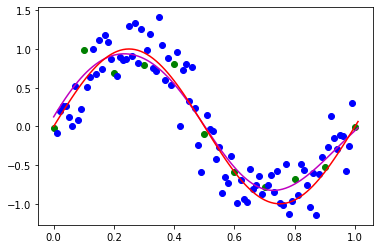

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, r, 'go', label=r'Training set')
ax.plot(test_x, test_r, 'bo', label=r'Test set')
ax.plot(xs, Ys, 'm-', label=r'prediction')
ax.plot(xs, np.sin(2 * math.pi * xs), 'r-', label=r'$r^{(t)} = sin(2 \pi x^{(t)})$')
ax.legend
plt.show()

In [ ]:
N = X.shape[0]
y = np.zeros((N, 1))


for newValue in range(N):
  for tc in range(len(alpha)):
    Y[newValue] += alpha[tc] * gaussianKernel(X[newValue, :], X[tc, :], sigma)
print('Training RMSE: ', math.sqrt((1 / N) * np.linalg.norm(y - r)**2))

Training RMSE:  0.6347181960467629


In [ ]:
testX = np.concatenate((np.ones((len(test_x), 1)), test_x.reshape(len(test_x), 1)), axis =1)
testN = testX.shape[0]
test_y = np.zeros((testN, 1))


for newValue in range(N):
  for tc in range(len(alpha)):
    test_Y[newValue, 0] += alpha[tc] * gaussianKernel(testX[newValue, :], X[tc, :], sigma)

print('Test RMSE: ', math.sqrt((1 / testN) * np.linalg.norm(test_y - test_r)**2))

Test RMSE:  0.7369030274940264


In [ ]:
s = np.array([2,
4,
])
t = np.array([0.6347181960467629,
  0.6347181960467629
])
tr = np.array([0.7369030274940264,
])

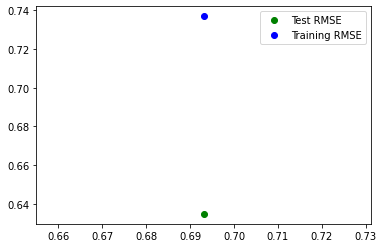

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.log(s[0:9]), t[0:9], 'go', label='Test RMSE')
ax.plot(np.log(s[0:9]), t[0:9], 'g-')
ax.plot(np.log(s[0:9]), tr[0:9], 'bo', label='Training RMSE')
ax.plot(np.log(s[0:9]), tr[0:9], 'b-')
ax.legend()
fig.show()